# Import Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import operator
from math import hypot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

# Data Cleaning

### Data Cleaning formulas we will use

In [2]:
properties = ['Apartment', 'House', 'Condomminium', 'Townhouse', 'Loft', 'Other']
def property_grouping(p):
    '''
    Given property type, if it is not an apartment, house, condo, townhouse, or loft,
    set as 'Other'
    '''
    if p not in properties:
        p = 'Other'
    return p

def make_dummies(df):
    '''
    Take column of categories and make dummies in the dataset.
    Drop the original columns
    '''
    columns = list(df.columns)
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = df.join(dummies)
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace('/','_')
    df.columns = df.columns.str.replace('-', '_')
    df.drop(columns=columns,inplace=True)
    return df

### We are setting the coordinates for the cities in the dataset and creating a function to calculate distance from these coordinates

In [116]:
test = pd.read_csv('train.csv')
test.sample(n=1)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
9048,19308998,4.828314,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,moderate,True,Chicago,"Cozy, updated, 1 bedroom! One block from Wrigl...",NaN,t,f,100%,2016-04-04,f,NaN,41.944485,-87.65392,"Cozy, updated 1 bedroom in heart of Wrigleyville!",Lakeview,0,NaN,https://a0.muscache.com/im/pictures/5925928d-8...,60657,1.0,1.0


In [124]:
la1 = np.deg2rad(lat_long['Chicago']['lat'])
la2 = np.deg2rad(42.006629)
lo1 = np.deg2rad(lat_long['Chicago']['long'])
lo2 = np.deg2rad(-87.685442)
la = (la1-la2)
lo = (lo1-lo2)
d = hypot(la,lo)*69.172
print(la1,la2,lo1,lo2,la,lo)
# a = (np.sin(la/2))**2 + np.cos(la1) * np.cos(la2) * ((np.sin(lo/2))**2)
# c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
# d = 637.1*c
print(d)

0.7309107294794374 0.7331539837137331 -1.529428532864127 -1.5303996689665216 -0.002243254234295722 0.0009711361023945209
0.1690869165234968


In [125]:
lat_long = {'SF': {'lat': 37.7749, 'long': -122.4194},
            'Chicago': {'lat': 41.8781, 'long': -87.6298},
            'DC': {'lat': 38.9072, 'long': -77.0369},
            'LA': {'lat': 34.0522, 'long': -118.2437},
            'Boston': {'lat': 42.3601, 'long': -71.0589},
            'NYC': {'lat': 40.7128, 'long': -74.0060}}

def get_distance(row):
    city = row['city']
    lat1 = np.deg2rad(lat_long[city]['lat'])
    lat2 = np.deg2rad(row['latitude'])
    long1 = np.deg2rad(lat_long[city]['long'])
    long2 = np.deg2rad(row['longitude'])
    lon = long1 - long2
    lat = lat1 - lat2
    a = (np.sin(lat/2))**2 + np.cos(lat1) * np.cos(lat2) * ((np.sin(lon/2))**2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return 69.172*c

### Cleaning up

In [126]:
#import data as dataframe
df = pd.read_csv('train.csv')

In [127]:
np.mean(df.log_price)

4.782069108304868

In [128]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [129]:
#drop duplicates for Airbnb ID's and drop NA in specific columns
df.drop_duplicates(subset=['id'],inplace=True)
df.dropna(subset=['bathrooms', 'host_has_profile_pic',
                  'host_identity_verified', 'host_since',
                  'bedrooms', 'beds']
                  , inplace=True)

#create our distance column
df['distance'] = df.apply(lambda r: get_distance(r), axis=1)

#convert host response rates and review scores to floats
df['host_response_rate'] = df['host_response_rate'].str.strip('%').astype('float')/100
df.review_scores_rating = df.review_scores_rating/100

#fill in empty host response rates and review scores
df['host_response_rate'].fillna(value=0.0, inplace=True)
df['review_scores_rating'].fillna(value=0.0, inplace=True)

#Replace t,f and True, False to 1,0
df.replace({'t':1, 'f': 0}, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype(int)

df.number_of_reviews = df.number_of_reviews.apply(lambda x: np.sqrt(x))

In [130]:
df['ppl_per_room'] = df['accommodates'] / df['bedrooms']

In [131]:
df.ppl_per_room = df.ppl_per_room.replace([np.inf, -np.inf], float(0.0))

In [132]:
#df.beds_rooms_ratio.describe()

### Drop unwanted columns

In [133]:
amenities_list = []
df['amenities'] = df['amenities'].str.replace('"','')
df['amenities'] = df['amenities'].str.replace('{', '')
df['amenities'] = df['amenities'].str.replace('}', '')
df['amenities'] = df['amenities'].str.split(',')

In [134]:
amenities_list = {}
for row in df['amenities']:
    for amenity in row:
        if amenity not in amenities_list:
            amenities_list[amenity] = 0
            
for row in df['amenities']:
    for amenity in row:
        if amenity in amenities_list:
            amenities_list[amenity] += 1

In [135]:
sorted_amenities = sorted(amenities_list.items(), key=operator.itemgetter(1),reverse=True)

In [136]:
df_cleaned = df.drop(columns = ['id','amenities', 'description',
                               'first_review', 'host_since', 'last_review',
                               'name', 'neighbourhood', 'thumbnail_url',
                               'zipcode', 'city', 'latitude', 'longitude', 'beds'])

In [137]:
df_cleaned['property_type'] = df_cleaned['property_type'].apply(property_grouping)

In [138]:
df_cleaned = df_cleaned[df_cleaned['cancellation_policy'].str.contains('super')==False]

In [139]:
B = df_cleaned.select_dtypes(exclude='object')
A = df_cleaned[['cleaning_fee', 'host_has_profile_pic', 'instant_bookable']]
B = B.drop(columns=list(A.columns))
C = df_cleaned.select_dtypes(include='object')

In [140]:
final_df = A.join(C)
final_df = final_df.join(B)

In [141]:
y = final_df.log_price
final_df.drop(columns='log_price',inplace=True)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size=.3)

In [143]:
corr = X_train.corr()

In [144]:
corr

,cleaning_fee,host_has_profile_pic,instant_bookable,accommodates,bathrooms,host_identity_verified,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,distance,ppl_per_room
cleaning_fee,1.000000,0.025101,0.008635,0.181891,0.055709,0.161938,0.263414,0.196235,0.254370,0.104587,0.007112,0.104122
host_has_profile_pic,0.025101,1.000000,-0.005502,-0.001912,-0.002203,0.077771,0.034688,0.038630,0.051690,0.008676,-0.004830,0.009993
instant_bookable,0.008635,-0.005502,1.000000,0.055924,0.001146,-0.084014,0.141801,0.076906,0.011750,-0.005757,0.008183,0.053672
accommodates,0.181891,-0.001912,0.055924,1.000000,0.510162,0.057987,0.134670,0.072884,0.047588,0.710469,0.045280,0.502682
bathrooms,0.055709,-0.002203,0.001146,0.510162,1.000000,0.018485,0.048565,-0.042849,-0.025228,0.593994,0.099354,0.090832
host_identity_verified,0.161938,0.077771,-0.084014,0.057987,0.018485,1.000000,0.124205,0.221744,0.224665,0.027843,-0.026277,0.055268
host_response_rate,0.263414,0.034688,0.141801,0.134670,0.048565,0.124205,1.000000,0.406321,0.386422,0.054079,0.081224,0.097270
number_of_reviews,0.196235,0.038630,0.076906,0.072884,-0.042849,0.221744,0.406321,1.000000,0.534977,-0.024885,-0.026682,0.093180
review_scores_rating,0.254370,0.051690,0.011750,0.047588,-0.025228,0.224665,0.386422,0.534977,1.000000,-0.009312,-0.025265,0.057213
bedrooms,0.104587,0.008676,-0.005757,0.710469,0.593994,0.027843,0.054079,-0.024885,-0.009312,1.000000,0.076190,0.238689


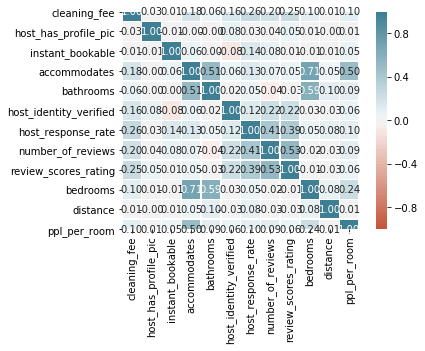

In [145]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    annot=True,
    fmt=".2f", linewidths=.5,
    cmap=sns.diverging_palette(20, 220, n=200),
   square=True
)

# Analysis

In [146]:
amenities_list

{'Wireless Internet': 70790,
 'Air conditioning': 54847,
 'Kitchen': 67086,
 'Heating': 66633,
 'Family/kid friendly': 36866,
 'Essentials': 63702,
 'Hair dryer': 43155,
 'Iron': 41495,
 'translation missing: en.hosting_amenity_50': 25159,
 'Washer': 42939,
 'Dryer': 42486,
 'Smoke detector': 61434,
 'Fire extinguisher': 30602,
 'Shampoo': 49240,
 'Hangers': 48945,
 'TV': 52166,
 'Cable TV': 24094,
 'Breakfast': 8273,
 'Buzzer/wireless intercom': 16871,
 'Carbon monoxide detector': 46974,
 'Laptop friendly workspace': 43509,
 'Internet': 44346,
 'Indoor fireplace': 9266,
 'First aid kit': 27425,
 'Elevator in building': 6399,
 'Pool': 6261,
 'Free parking on premises': 23542,
 'Gym': 7444,
 'Hot tub': 6308,
 'Wheelchair accessible': 4823,
 'Doorman': 4735,
 'Dog(s)': 5234,
 'Cat(s)': 3562,
 'Other pet(s)': 375,
 'Lock on bedroom door': 17910,
 'Pets live on this property': 9668,
 'Private entrance': 7249,
 'Hot water': 4243,
 'Bed linens': 4150,
 'Extra pillows and blankets': 3008,
 'C

In [147]:
final_df.head()

,cleaning_fee,host_has_profile_pic,instant_bookable,property_type,room_type,bed_type,cancellation_policy,accommodates,bathrooms,host_identity_verified,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,distance,ppl_per_room
0,1,1,0,Apartment,Entire home/apt,Real Bed,strict,3,1.0,1,0.0,1.414214,1.00,1.0,0.023652,3.000000
1,1,1,1,Apartment,Entire home/apt,Real Bed,strict,7,1.0,0,1.0,2.449490,0.93,3.0,0.066210,2.333333
2,1,1,1,Apartment,Entire home/apt,Real Bed,moderate,5,1.0,1,1.0,3.162278,0.92,1.0,0.128374,5.000000
3,1,1,0,House,Entire home/apt,Real Bed,flexible,4,1.0,1,0.0,0.000000,0.00,2.0,0.012173,2.000000
4,1,1,1,Apartment,Entire home/apt,Real Bed,moderate,2,1.0,1,1.0,2.000000,0.40,0.0,0.022352,0.000000


In [148]:
X_numeric_train = X_train.iloc[:,7:]
X_categorical_train = X_train.iloc[:,3:7]
X_extra_train = X_train.iloc[:,:3]

In [149]:
ss = StandardScaler()

X_num_train_col = X_numeric_train.columns
X_num_train_ind = X_numeric_train.index

X_numeric_train = pd.DataFrame(ss.fit_transform(X_numeric_train))

X_numeric_train.columns = X_num_train_col
X_numeric_train.index = X_num_train_ind

In [150]:
X_numeric_train = X_numeric_train[(np.abs(X_numeric_train) < 2.5).all(axis=1)]

X_categorical_train = X_categorical_train[X_categorical_train.index.isin(X_numeric_train.index)]
X_extra_train = X_extra_train[X_extra_train.index.isin(X_numeric_train.index)]
y_train = y_train[y_train.index.isin(X_numeric_train.index)]

In [151]:
dummies_train = make_dummies(X_train.iloc[:,3:7])

In [152]:
X1 = X_numeric_train.join(X_categorical_train)
X1 = X1.join(X_extra_train)
X1 = X1.join(dummies_train)

X1.drop(columns=['property_type','room_type','bed_type','cancellation_policy'],inplace=True)

In [153]:
X1.drop(columns=['Apartment', 'Entire_home_apt', 'Real_Bed', 'moderate'],inplace=True)
lr = LinearRegression()
lr.fit(X1,y_train)
lr.score(X1,y_train)

0.5002183180601465

In [154]:
X1.head()

,accommodates,bathrooms,host_identity_verified,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,distance,ppl_per_room,cleaning_fee,host_has_profile_pic,instant_bookable,House,Loft,Other,Townhouse,Private_room,Shared_room,Airbed,Couch,Futon,Pull_out_Sofa,flexible,strict
6294,-0.536402,-0.404891,0.696725,0.669175,-0.391897,0.680640,-1.476892,-0.110869,-1.721240,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
26116,0.390354,-0.404891,-1.435287,0.204091,0.517275,0.530485,-0.308674,-0.892198,1.534720,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
56096,-0.536402,-0.404891,0.696725,-0.028452,0.067272,0.605562,-0.308674,0.661258,-0.093260,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
68577,0.853732,-0.404891,0.696725,0.669175,-0.705514,0.680640,0.859544,1.626051,0.313735,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
30534,-0.999781,-0.404891,-1.435287,0.669175,-0.575610,0.680640,-0.308674,-0.822202,-0.907250,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1


# Test Data

In [155]:
X_numeric_test = X_test.iloc[:,7:]
X_categorical_test = X_test.iloc[:,3:7]
X_extra_test = X_test.iloc[:,:3]

ss = StandardScaler()

X_num_test_col = X_numeric_test.columns
X_num_test_ind = X_numeric_test.index

X_numeric_test = pd.DataFrame(ss.fit_transform(X_numeric_test))

X_numeric_test.columns = X_num_test_col
X_numeric_test.index = X_num_test_ind

X_numeric_test = X_numeric_test[(np.abs(X_numeric_test) < 2.5).all(axis=1)]

X_categorical_test = X_categorical_test[X_categorical_test.index.isin(X_numeric_test.index)]
X_extra_test = X_extra_test[X_extra_test.index.isin(X_numeric_test.index)]
y_test = y_test[y_test.index.isin(X_numeric_test.index)]

dummies_test = make_dummies(X_test.iloc[:,3:7])

X2 = X_numeric_test.join(X_categorical_test)
X2 = X2.join(X_extra_test)
X2 = X2.join(dummies_test)

X2.drop(columns=['property_type','room_type','bed_type','cancellation_policy'],inplace=True)
X2.drop(columns=['Apartment', 'Entire_home_apt', 'Real_Bed', 'moderate'],inplace=True)

lr = LinearRegression()
lr.fit(X2,y_test)
lr.score(X2,y_test)

0.4987613165265416

### Baseline

In [156]:
X1.head()

,accommodates,bathrooms,host_identity_verified,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,distance,ppl_per_room,cleaning_fee,host_has_profile_pic,instant_bookable,House,Loft,Other,Townhouse,Private_room,Shared_room,Airbed,Couch,Futon,Pull_out_Sofa,flexible,strict
6294,-0.536402,-0.404891,0.696725,0.669175,-0.391897,0.680640,-1.476892,-0.110869,-1.721240,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
26116,0.390354,-0.404891,-1.435287,0.204091,0.517275,0.530485,-0.308674,-0.892198,1.534720,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
56096,-0.536402,-0.404891,0.696725,-0.028452,0.067272,0.605562,-0.308674,0.661258,-0.093260,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
68577,0.853732,-0.404891,0.696725,0.669175,-0.705514,0.680640,0.859544,1.626051,0.313735,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
30534,-0.999781,-0.404891,-1.435287,0.669175,-0.575610,0.680640,-0.308674,-0.822202,-0.907250,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1


In [157]:
f1 = 'log_price ~ ' + '+'.join(X1.columns)
mod = smf.ols(formula=f1, data = X1.join(y_train))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     1894.
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:13:13   Log-Likelihood:                -30120.
No. Observations:               45443   AIC:                         6.029e+04
Df Residuals:                   45418   BIC:                         6.051e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.1355      0.040    129.281      0.000       5.058       5.213
accommodates               0.1976      0.006     35.496      0.000       0.187       0.209
bathrooms                  0.0864      0.004     21.375      0.000       0.078       0.094
host_identity_verified    -0.0041      0.002     -1.796      0.072      -0.009       0.000
host_response_rate        -0.0294      0.003    -11.547      0.000      -0.034      -0.024
number_of_reviews         -0.0218      0.003     -6.479      0.000      -0.028      -0.015
review_scores_rating      -0.0568      0.003    -20.383      0.000      -0.062      -0.051
bedrooms                   0.0959      0.004     23.517      0.000       0.088       0.104
distance                  -0.1466      0.003    -46.995      0.000      -0.153      -0.141
ppl_per_room              -0.0081      0.003     -2.641      0.008      -0.014      -0.002
cleaning_fee              -0.0272      0.006     -4.921      0.000      -0.038      -0.016
host_has_profile_pic      -0.0979      0.039     -2.497      0.013      -0.175      -0.021
instant_bookable          -0.0482      0.005     -9.357      0.000      -0.058      -0.038
House                      0.0247      0.006      4.023      0.000       0.013       0.037
Loft                       0.1371      0.017      7.843      0.000       0.103       0.171
Other                      0.1393      0.009     15.991      0.000       0.122       0.156
Townhouse                  0.0329      0.015      2.135      0.033       0.003       0.063
Private_room              -0.5625      0.006    -97.242      0.000      -0.574      -0.551
Shared_room               -0.9861      0.015    -67.325      0.000      -1.015      -0.957
Airbed                    -0.0457      0.027     -1.711      0.087      -0.098       0.007
Couch                      0.0551      0.037      1.486      0.137      -0.018       0.128
Futon                     -0.0728      0.022     -3.278      0.001      -0.116      -0.029
Pull_out_Sofa              0.0164      0.024      0.681      0.496      -0.031       0.064
flexible                  -0.0034      0.006     -0.534      0.593      -0.016       0.009
strict                     0.0355      0.006      6.420      0.000       0.025       0.046
==============================================================================
Omnibus:                     4134.462   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10500.001
Skew:                           0.536   Prob(JB):                         0.00
Kurtosis:                       5.097   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance mat

In [158]:
f2 = 'log_price ~ ' + '+'.join(X2.columns)
mod = smf.ols(formula=f2, data = X2.join(y_test))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     806.2
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:13:13   Log-Likelihood:                -13106.
No. Observations:               19471   AIC:                         2.626e+04
Df Residuals:                   19446   BIC:                         2.646e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.0788      0.067     76.016      0.000       4.948       5.210
accommodates               0.2080      0.009     23.986      0.000       0.191       0.225
bathrooms                  0.0861      0.006     13.799      0.000       0.074       0.098
host_identity_verified     0.0011      0.004      0.301      0.764      -0.006       0.008
host_response_rate        -0.0326      0.004     -8.262      0.000      -0.040      -0.025
number_of_reviews         -0.0113      0.005     -2.178      0.029      -0.021      -0.001
review_scores_rating      -0.0630      0.004    -14.698      0.000      -0.071      -0.055
bedrooms                   0.0937      0.006     15.041      0.000       0.081       0.106
distance                  -0.1380      0.005    -28.705      0.000      -0.147      -0.129
ppl_per_room              -0.0081      0.005     -1.696      0.090      -0.018       0.001
cleaning_fee              -0.0186      0.009     -2.180      0.029      -0.035      -0.002
host_has_profile_pic      -0.0531      0.066     -0.804      0.422      -0.183       0.076
instant_bookable          -0.0557      0.008     -6.900      0.000      -0.072      -0.040
House                      0.0102      0.009      1.087      0.277      -0.008       0.029
Loft                       0.1443      0.026      5.487      0.000       0.093       0.196
Other                      0.1116      0.013      8.314      0.000       0.085       0.138
Townhouse                  0.0224      0.025      0.910      0.363      -0.026       0.071
Private_room              -0.5614      0.009    -63.019      0.000      -0.579      -0.544
Shared_room               -0.9905      0.022    -44.484      0.000      -1.034      -0.947
Airbed                    -0.0464      0.044     -1.060      0.289      -0.132       0.039
Couch                      0.0487      0.056      0.874      0.382      -0.061       0.158
Futon                     -0.0426      0.032     -1.320      0.187      -0.106       0.021
Pull_out_Sofa              0.0617      0.038      1.623      0.105      -0.013       0.136
flexible                   0.0301      0.010      3.095      0.002       0.011       0.049
strict                     0.0450      0.009      5.272      0.000       0.028       0.062
==============================================================================
Omnibus:                     1928.854   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6511.713
Skew:                           0.493   Prob(JB):                         0.00
Kurtosis:                       5.656   Cond. No.                         49.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance mat

# STOP

In [ ]:
np.exp(5)

In [ ]:
final_df.sample(n=5)

In [ ]:
X1.head()

In [88]:
X1.drop(columns=['host_identity_verified', 'Townhouse','Airbed', 'Pull_out_Sofa', 'flexible'],inplace=True)
f1 = 'log_price ~ ' + '+'.join(X1.columns)
mod = smf.ols(formula=f1, data = X1.join(y_train))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2122.
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:38:09   Log-Likelihood:                -28962.
No. Observations:               43063   AIC:                         5.796e+04
Df Residuals:                   43043   BIC:                         5.814e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.1519      0.042    123.084      0.000       5.070       5.234
accommodates             0.1963      0.006     33.940      0.000       0.185       0.208
bathrooms                0.0869      0.004     20.915      0.000       0.079       0.095
host_response_rate      -0.0380      0.003    -14.373      0.000      -0.043      -0.033
number_of_reviews       -0.0149      0.003     -4.267      0.000      -0.022      -0.008
review_scores_rating    -0.0543      0.003    -19.024      0.000      -0.060      -0.049
bedrooms                 0.0875      0.004     20.735      0.000       0.079       0.096
distance                -0.0033      0.004     -0.801      0.423      -0.011       0.005
ppl_per_room            -0.0054      0.003     -1.692      0.091      -0.012       0.001
cleaning_fee            -0.0289      0.006     -5.168      0.000      -0.040      -0.018
host_has_profile_pic    -0.0970      0.042     -2.335      0.020      -0.179      -0.016
instant_bookable        -0.0489      0.005     -9.194      0.000      -0.059      -0.038
House                   -0.0767      0.006    -12.506      0.000      -0.089      -0.065
Loft                     0.1571      0.018      8.630      0.000       0.121       0.193
Other                    0.0512      0.009      5.623      0.000       0.033       0.069
Private_room            -0.5899      0.006    -98.781      0.000      -0.602      -0.578
Shared_room             -1.0076      0.015    -67.977      0.000      -1.037      -0.979
Couch                    0.0404      0.038      1.063      0.288      -0.034       0.115
Futon                   -0.0945      0.023     -4.159      0.000      -0.139      -0.050
strict                   0.0451      0.005      9.188      0.000       0.035       0.055
==============================================================================
Omnibus:                     4907.504   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13637.070
Skew:                           0.632   Prob(JB):                         0.00
Kurtosis:                       5.450   Cond. No.                         46.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
X1.drop(columns=['host_has_profile_pic'],inplace=True)
f1 = 'log_price ~ ' + '+'.join(X1.columns)
mod = smf.ols(formula=f1, data = X1.join(y_train))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     2240.
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        16:38:10   Log-Likelihood:                -28965.
No. Observations:               43063   AIC:                         5.797e+04
Df Residuals:                   43044   BIC:                         5.813e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.0552      0.006    809.238      0.000       5.043       5.067
accommodates             0.1964      0.006     33.958      0.000       0.185       0.208
bathrooms                0.0870      0.004     20.926      0.000       0.079       0.095
host_response_rate      -0.0381      0.003    -14.406      0.000      -0.043      -0.033
number_of_reviews       -0.0149      0.003     -4.273      0.000      -0.022      -0.008
review_scores_rating    -0.0545      0.003    -19.102      0.000      -0.060      -0.049
bedrooms                 0.0874      0.004     20.717      0.000       0.079       0.096
distance                -0.0033      0.004     -0.805      0.421      -0.011       0.005
ppl_per_room            -0.0055      0.003     -1.716      0.086      -0.012       0.001
cleaning_fee            -0.0290      0.006     -5.185      0.000      -0.040      -0.018
instant_bookable        -0.0488      0.005     -9.168      0.000      -0.059      -0.038
House                   -0.0768      0.006    -12.522      0.000      -0.089      -0.065
Loft                     0.1568      0.018      8.613      0.000       0.121       0.193
Other                    0.0511      0.009      5.613      0.000       0.033       0.069
Private_room            -0.5899      0.006    -98.776      0.000      -0.602      -0.578
Shared_room             -1.0076      0.015    -67.974      0.000      -1.037      -0.979
Couch                    0.0400      0.038      1.053      0.292      -0.034       0.115
Futon                   -0.0948      0.023     -4.171      0.000      -0.139      -0.050
strict                   0.0450      0.005      9.171      0.000       0.035       0.055
==============================================================================
Omnibus:                     4914.206   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13654.739
Skew:                           0.633   Prob(JB):                         0.00
Kurtosis:                       5.451   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Visualizations

In [159]:
final_df
actual_prices = y.apply(lambda Y: np.exp(Y))
actual_prices

0        150.0
1        169.0
2        145.0
3        750.0
4        115.0
         ...  
74106    100.0
74107    155.0
74108    185.0
74109    195.0
74110    128.0
Name: log_price, Length: 73455, dtype: float64

In [160]:
df_vis = final_df.join(actual_prices)

In [161]:
df_vis

,cleaning_fee,host_has_profile_pic,instant_bookable,property_type,room_type,bed_type,cancellation_policy,accommodates,bathrooms,host_identity_verified,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,distance,ppl_per_room,log_price
0,1,1,0,Apartment,Entire home/apt,Real Bed,strict,3,1.0,1,0.0,1.414214,1.00,1.0,0.023652,3.000000,150.0
1,1,1,1,Apartment,Entire home/apt,Real Bed,strict,7,1.0,0,1.0,2.449490,0.93,3.0,0.066210,2.333333,169.0
2,1,1,1,Apartment,Entire home/apt,Real Bed,moderate,5,1.0,1,1.0,3.162278,0.92,1.0,0.128374,5.000000,145.0
3,1,1,0,House,Entire home/apt,Real Bed,flexible,4,1.0,1,0.0,0.000000,0.00,2.0,0.012173,2.000000,750.0
4,1,1,1,Apartment,Entire home/apt,Real Bed,moderate,2,1.0,1,1.0,2.000000,0.40,0.0,0.022352,0.000000,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,0,1,0,Apartment,Private room,Real Bed,flexible,1,1.0,1,0.0,0.000000,0.00,1.0,0.061113,1.000000,100.0
74107,1,1,0,Apartment,Entire home/apt,Real Bed,moderate,4,2.0,0,1.0,4.000000,0.93,2.0,0.266156,2.000000,155.0
74108,1,1,1,Apartment,Entire home/apt,Real Bed,moderate,5,1.0,1,1.0,6.557439,0.94,2.0,0.058681,2.500000,185.0
74109,1,1,1,Apartment,Entire home/apt,Real Bed,strict,2,1.0,0,1.0,0.000000,0.00,0.0,0.031526,0.000000,195.0


In [162]:
num_people = df['accommodates'].unique()

In [42]:
num_people = sorted(num_people)

In [43]:
num_people

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [44]:
df['instant_bookable'].value_counts()

0    54226
1    19353
Name: instant_bookable, dtype: int64

In [45]:
probability = []
responses = []
rooms = []
distances = []
per_room = []
prices = []
bathrooms = []
#verified = []
for n in num_people:
    temp_df = df_vis[df_vis['accommodates'] == n]
    n_y = list(temp_df['instant_bookable'].value_counts())
    
    response_mean = np.mean(temp_df['host_response_rate'])
    room_mean = np.mean(temp_df['bedrooms'])
    distance_mean = np.mean(temp_df['distance'])
    ppl = np.mean(temp_df['ppl_per_room'])
    price = np.mean(temp_df['log_price'])
    bathroom = np.mean(temp_df['bathrooms'])
    #verify = list(temp_df['host'])
    
    responses.append(response_mean)
    probability.append(n_y[1]/sum(n_y))
    rooms.append(room_mean)
    distances.append(distance_mean)
    per_room.append(ppl)
    prices.append(price)
    bathrooms.append(bathroom)

responses
rooms
distances
per_room
prices
bathrooms

[1.1194438479707967,
 1.0864497097725758,
 1.0769578702507108,
 1.2086081656508307,
 1.427883211678832,
 1.6465656565656566,
 1.8103813559322033,
 2.1204379562043796,
 2.2193308550185873,
 2.5522922636103154,
 2.411392405063291,
 2.944866920152091,
 2.2777777777777777,
 3.29126213592233,
 2.675925925925926,
 2.8114478114478114]

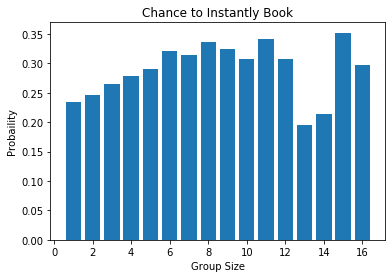

In [46]:
plt.bar(num_people,probability)
plt.title('Chance to Instantly Book')
plt.xlabel('Group Size')
plt.ylabel('Probaility')
plt.show()

<BarContainer object of 16 artists>

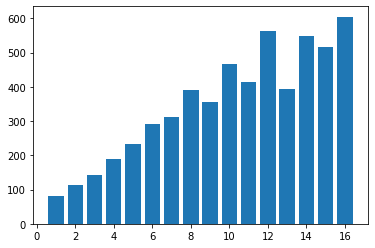

In [49]:
plt.bar(num_people,prices)
plt.title('Average ')

Text(0.5, 0, 'Group Size')

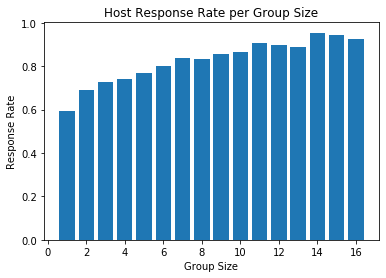

In [47]:
plt.bar(num_people, responses)
plt.title('Host Response Rate per Group Size')
plt.ylabel('Response Rate')
plt.xlabel('Group Size')

### Fix

<BarContainer object of 16 artists>

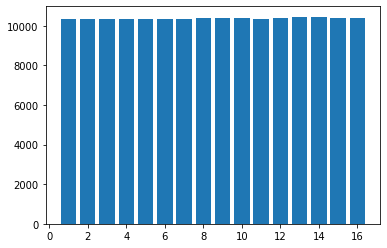

In [48]:
plt.bar(num_people,distances)